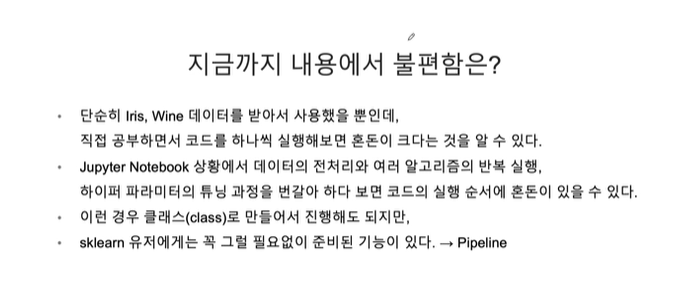

In [1]:
import pandas as pd
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url,sep=';')
white_wine = pd.read_csv(white_url,sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine,white_wine])

X = wine.drop(['color'] , axis=1)
y = wine['color']

Standard를 하고 Tree를 만드는 과정을 Pipeline코드로 구현하면?

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier())
]

pipe = Pipeline(estimators)

In [3]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [4]:
#각 단계 확인
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [5]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [7]:
pipe['scaler']

StandardScaler()

이제 각 단계에 파라미터 적용해야함
- set_params

In [8]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13,
                                                    stratify=y)


In [10]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3437,6.7,0.40,0.22,8.8,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,5
2124,7.7,0.39,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7
3005,6.9,0.30,0.36,0.9,0.037,40.0,156.0,0.98968,3.08,0.36,12.1,6
2436,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5
444,6.9,0.24,0.36,20.8,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4710,5.4,0.33,0.31,4.0,0.030,27.0,108.0,0.99031,3.30,0.43,12.2,7
44,6.7,0.23,0.26,1.4,0.060,33.0,154.0,0.99340,3.24,0.56,9.5,6
1987,8.1,0.22,0.28,7.7,0.043,57.0,176.0,0.99540,3.12,0.55,10.0,5
2422,6.2,0.44,0.18,7.7,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5


In [12]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [13]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))

Train Acc: 0.9657494708485664
Test Acc: 0.9576923076923077
